In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score



import warnings
warnings.filterwarnings('ignore')

In [3]:
#buat fungsi untuk reduce memory.
#intinya adalah iterasi keseluruh kolom pada dataframe dan mengubah datatype yg memorynya paling kecil.
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#fungsi untuk memanggil dataframe
def import_data(file):
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [4]:
data = import_data('/Users/achmadfauzitrinanda/Downloads/data_final.csv')

Memory usage of dataframe is 220.16 MB
Memory usage after optimization is: 73.39 MB
Decreased by 66.7%


In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Prev_IP_AMT_INSTALMENT,Prev_IP_AMT_PAYMENT,Prev_CCB_AMT_BALANCE,Prev_CCB_AMT_CREDIT_LIMIT_ACTUAL,Prev_CCB_AMT_DRAWINGS_CURRENT,Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT,Prev_CCB_AMT_RECEIVABLE_PRINCIPAL,Prev_CCB_AMT_RECIVABLE,Prev_CCB_AMT_TOTAL_RECEIVABLE,TARGET
0,0,0,100002,0,0,0,0,202500.0,406597.5,24700.5,...,21081.261719,21081.261719,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,1.0
1,1,1,100003,0,0,1,0,270000.0,1293502.5,35698.5,...,23136.941406,23136.941406,14996.948242,137903.218750,9184.992188,9456.458008,14305.061523,14548.675781,14548.675781,0.0
2,2,2,100004,1,1,0,0,67500.0,135000.0,6750.0,...,11450.142578,11450.142578,10685.238281,82025.320312,1090.424072,1530.968384,10255.441406,10597.750977,10597.750977,0.0
3,3,3,100006,0,0,0,0,135000.0,312682.5,29686.5,...,44632.816406,41626.031250,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,0.0
4,4,4,100007,0,0,0,0,121500.0,513000.0,21865.5,...,102297.515625,101564.226562,101208.390625,101250.000000,11736.103516,367.753510,88407.226562,98558.921875,98558.921875,0.0


In [6]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [7]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,Prev_IP_AMT_INSTALMENT,Prev_IP_AMT_PAYMENT,Prev_CCB_AMT_BALANCE,Prev_CCB_AMT_CREDIT_LIMIT_ACTUAL,Prev_CCB_AMT_DRAWINGS_CURRENT,Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT,Prev_CCB_AMT_RECEIVABLE_PRINCIPAL,Prev_CCB_AMT_RECIVABLE,Prev_CCB_AMT_TOTAL_RECEIVABLE,TARGET
0,100002,0,0,0,0,202500.0,406597.5,24700.5,351000.0,248526.0,...,21081.261719,21081.261719,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,1.0
1,100003,0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,40149.0,...,23136.941406,23136.941406,14996.948242,137903.218750,9184.992188,9456.458008,14305.061523,14548.675781,14548.675781,0.0
2,100004,1,1,0,0,67500.0,135000.0,6750.0,135000.0,248526.0,...,11450.142578,11450.142578,10685.238281,82025.320312,1090.424072,1530.968384,10255.441406,10597.750977,10597.750977,0.0
3,100006,0,0,0,0,135000.0,312682.5,29686.5,297000.0,248526.0,...,44632.816406,41626.031250,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,0.0
4,100007,0,0,0,0,121500.0,513000.0,21865.5,513000.0,248526.0,...,102297.515625,101564.226562,101208.390625,101250.000000,11736.103516,367.753510,88407.226562,98558.921875,98558.921875,0.0


In [8]:
#split ke data training dan testing
data_train = data[:307511]
data_test = data[307511:]

In [9]:
data_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [10]:
data_train.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,Prev_IP_AMT_INSTALMENT,Prev_IP_AMT_PAYMENT,Prev_CCB_AMT_BALANCE,Prev_CCB_AMT_CREDIT_LIMIT_ACTUAL,Prev_CCB_AMT_DRAWINGS_CURRENT,Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT,Prev_CCB_AMT_RECEIVABLE_PRINCIPAL,Prev_CCB_AMT_RECIVABLE,Prev_CCB_AMT_TOTAL_RECEIVABLE,TARGET
0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,248526.0,158774.0,...,21081.261719,21081.261719,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,1.0
1,0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,40149.0,21703.0,...,23136.941406,23136.941406,14996.948242,137903.218750,9184.992188,9456.458008,14305.061523,14548.675781,14548.675781,0.0
2,1,1,0,0,67500.0,135000.0,6750.0,135000.0,248526.0,158774.0,...,11450.142578,11450.142578,10685.238281,82025.320312,1090.424072,1530.968384,10255.441406,10597.750977,10597.750977,0.0
3,0,0,0,0,135000.0,312682.5,29686.5,297000.0,248526.0,158774.0,...,44632.816406,41626.031250,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,0.0
4,0,0,0,0,121500.0,513000.0,21865.5,513000.0,248526.0,158774.0,...,102297.515625,101564.226562,101208.390625,101250.000000,11736.103516,367.753510,88407.226562,98558.921875,98558.921875,0.0


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   NAME_CONTRACT_TYPE                  307511 non-null  int8   
 1   FLAG_OWN_CAR                        307511 non-null  int8   
 2   FLAG_OWN_REALTY                     307511 non-null  int8   
 3   CNT_CHILDREN                        307511 non-null  int8   
 4   AMT_INCOME_TOTAL                    307511 non-null  float32
 5   AMT_CREDIT                          307511 non-null  float32
 6   AMT_ANNUITY                         307511 non-null  float32
 7   AMT_GOODS_PRICE                     307511 non-null  float32
 8   NAME_TYPE_SUITE                     307511 non-null  float32
 9   NAME_INCOME_TYPE                    307511 non-null  float32
 10  NAME_EDUCATION_TYPE                 307511 non-null  int32  
 11  NAME_FAMILY_STATUS        


**Convert Negative Values to Positive Values**

The features that have negative values are DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE


In [12]:
data_train.iloc[:,:79] = data_train.iloc[:,:79].abs()

In [13]:
#Feature Selection
x = data_train.drop(['TARGET'], axis=1)
y = data_train['TARGET']

In [14]:
#feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
14,DAYS_EMPLOYED,1.954124e+08
7,AMT_GOODS_PRICE,1.223080e+08
5,AMT_CREDIT,7.669987e+07
9,NAME_INCOME_TYPE,2.665760e+07
10,NAME_EDUCATION_TYPE,1.732433e+07
...,...,...
38,FLAG_DOCUMENT_7,7.098728e-01
48,FLAG_DOCUMENT_19,5.663612e-01
36,FLAG_DOCUMENT_5,3.020010e-02
49,FLAG_DOCUMENT_20,1.425955e-02


Handling Imbalance Data

In [15]:
# create two different dataframe of majority and minority class 
df_majority = data_train[(data_train['TARGET']==0)] 
df_minority = data_train[(data_train['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

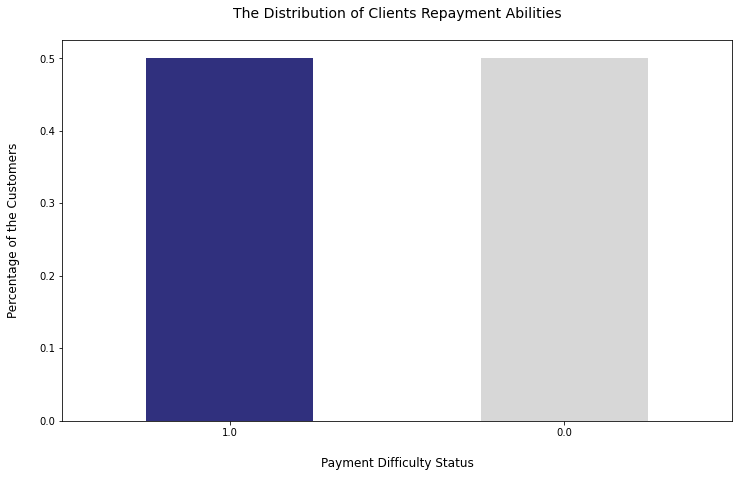

In [16]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

Data Splitting

In [17]:
# define x and y features (top 20 features)
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                           'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 
                           'Bureau_AMT_CREDIT_SUM_DEBT', 'DAYS_ID_PUBLISH', 'NAME_TYPE_SUITE',
                          'Bureau_AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY', 'FONDKAPREMONT_MODE', 'Bureau_AMT_CREDIT_MAX_OVERDUE',
                          'Bureau_AMT_CREDIT_SUM', 'Prev_CCB_AMT_DRAWINGS_CURRENT', 'Bureau_AMT_ANNUITY', 'Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT']]
y_balanced = df_upsampled['TARGET']

In [18]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [19]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


**Model Building**

Here are some algorithms that will be tested to determine the best model:

1. Logistic Regression
2. Gaussian Naive Bayes
3. Decision Tree
4. Random Forest
5. Neural Network



1. Logistic Regression

In [20]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [21]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59    226185
         1.0       0.60      0.61      0.61    226112

    accuracy                           0.60    452297
   macro avg       0.60      0.60      0.60    452297
weighted avg       0.60      0.60      0.60    452297



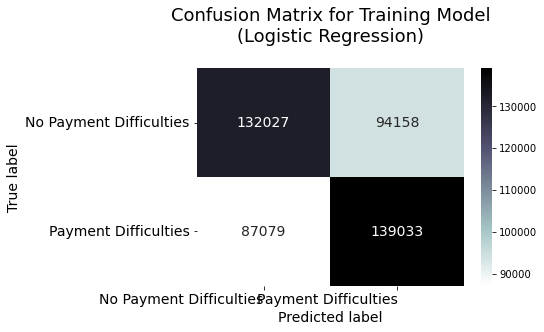

In [22]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [23]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59     56501
         1.0       0.60      0.62      0.61     56574

    accuracy                           0.60    113075
   macro avg       0.60      0.60      0.60    113075
weighted avg       0.60      0.60      0.60    113075



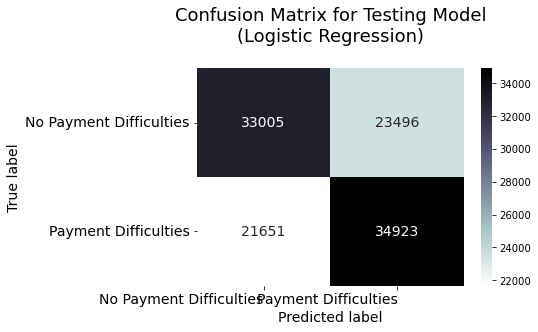

In [24]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [25]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 59.93
Test Accuracy: % 60.07


In [26]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6007



2. Gaussian Naive Bayes

In [27]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [28]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.62      0.26      0.37    226185
         1.0       0.53      0.84      0.65    226112

    accuracy                           0.55    452297
   macro avg       0.58      0.55      0.51    452297
weighted avg       0.58      0.55      0.51    452297



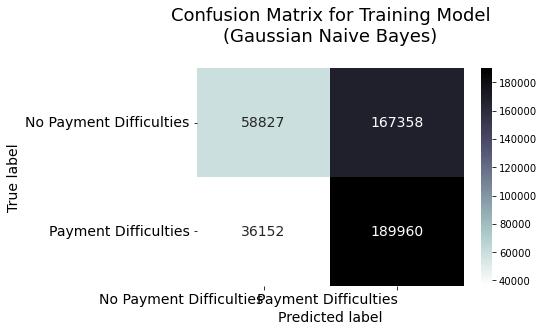

In [29]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [30]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.62      0.26      0.37     56501
         1.0       0.53      0.84      0.65     56574

    accuracy                           0.55    113075
   macro avg       0.58      0.55      0.51    113075
weighted avg       0.58      0.55      0.51    113075



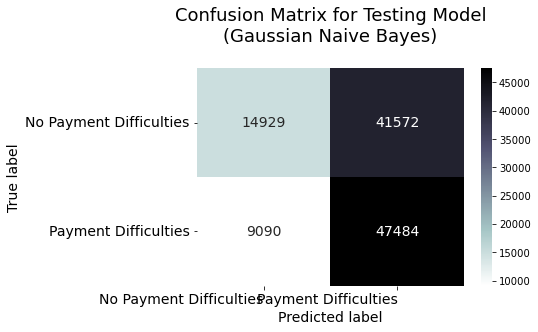

In [31]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [32]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 55.01
Test Accuracy: % 55.2


In [33]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.5518


3. Decision Tree

In [34]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [35]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    226185
         1.0       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



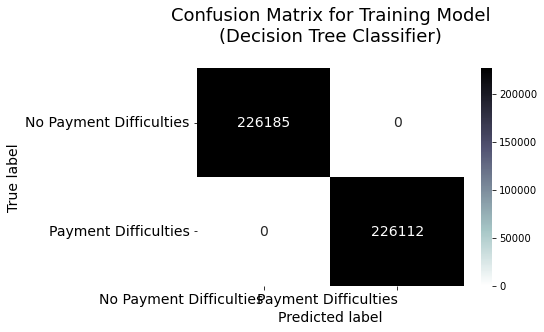

In [36]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [37]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

         0.0       0.69      0.91      0.78     56501
         1.0       0.87      0.60      0.71     56574

    accuracy                           0.75    113075
   macro avg       0.78      0.75      0.74    113075
weighted avg       0.78      0.75      0.74    113075



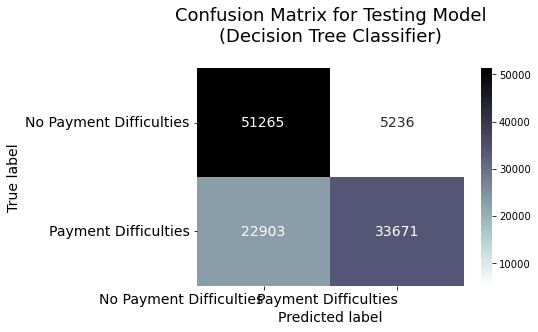

In [38]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [39]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 75.11


In [40]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.7512


4. Random Forest

In [41]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [42]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    226185
         1.0       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



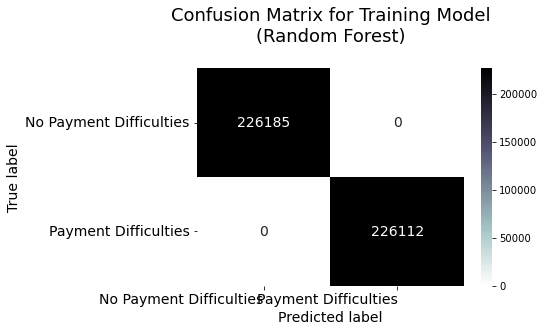

In [43]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [44]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     56501
         1.0       1.00      0.94      0.97     56574

    accuracy                           0.97    113075
   macro avg       0.97      0.97      0.97    113075
weighted avg       0.97      0.97      0.97    113075



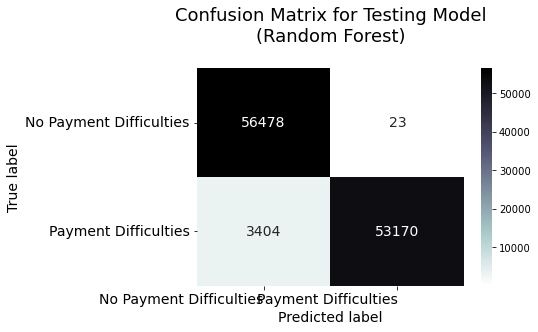

In [45]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [46]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 96.97


In [47]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9697


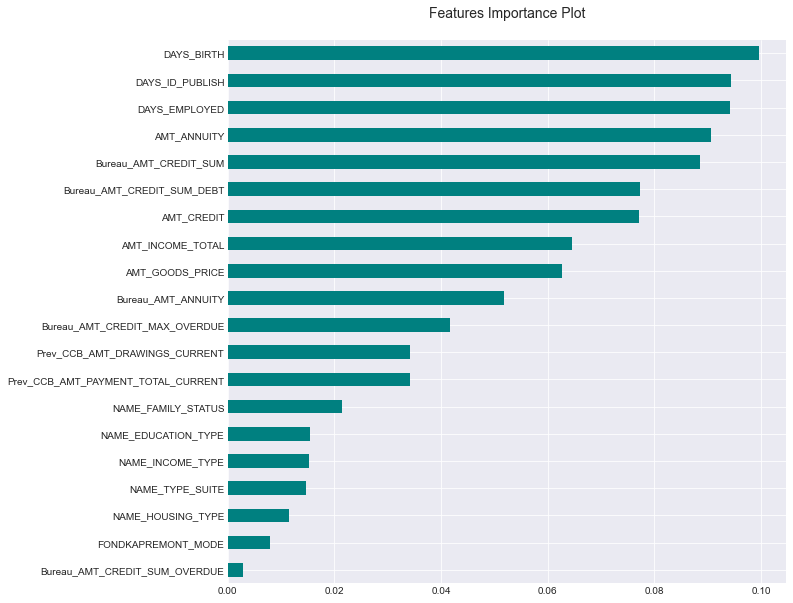

In [48]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

5. Neural Network

In [51]:
# train the model
nn_model = MLPClassifier().fit(X_train, y_train)

In [52]:
# predit data train
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

         0.0       0.62      0.71      0.66    226185
         1.0       0.66      0.56      0.61    226112

    accuracy                           0.64    452297
   macro avg       0.64      0.64      0.64    452297
weighted avg       0.64      0.64      0.64    452297



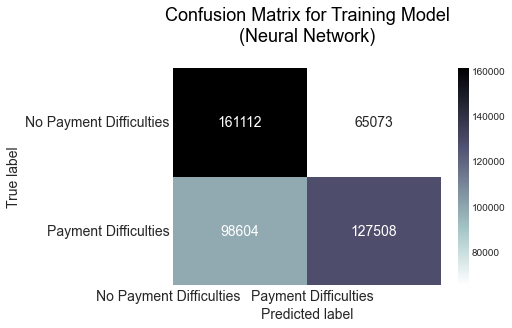

In [53]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [54]:
# predit data test
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

Classification Report Testing Model (Neural Network):
              precision    recall  f1-score   support

         0.0       0.61      0.71      0.66     56501
         1.0       0.66      0.55      0.60     56574

    accuracy                           0.63    113075
   macro avg       0.63      0.63      0.63    113075
weighted avg       0.63      0.63      0.63    113075



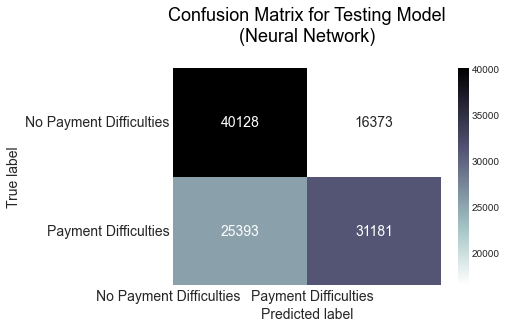

In [55]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [56]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nn_train))
print("Test Accuracy: % {}".format(acc_nn_test))

Training Accuracy: % 63.81
Test Accuracy: % 63.06


In [57]:
# ROC scores
roc_auc_nn = round(roc_auc_score(y_test, y_test_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

ROC AUC: 0.6307


**Model Selection**

In [58]:
results = pd.DataFrame([["Logistic Regression", 0.5993, 0.6007, 0.6007],["Gaussian Naive Bayes", 0.5501, 0.552, 0.5518],
                       ["Decision Tree", 1, 0.7511, 0.7512],["Random Forest", 1, 0.9697, 0.9697],
                       ["Neural Network", 0.6381, 0.6306, 0.6307]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')



,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
3,Random Forest,1.000000,0.969700,0.969700
2,Decision Tree,1.000000,0.751100,0.751200
4,Neural Network,0.638100,0.630600,0.630700
0,Logistic Regression,0.599300,0.600700,0.600700
1,Gaussian Naive Bayes,0.550100,0.552000,0.551800


The prediction accuracy of the train and test data in Random Forest model has a value that is not much different, it can be said that the model is very good, which is there is no underfitting or overfitting. So the Random Forest model was chosen as the best model to predict client’s repayment abilities.

**Prediction**

In [82]:
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,Prev_IP_AMT_INSTALMENT,Prev_IP_AMT_PAYMENT,Prev_CCB_AMT_BALANCE,Prev_CCB_AMT_CREDIT_LIMIT_ACTUAL,Prev_CCB_AMT_DRAWINGS_CURRENT,Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT,Prev_CCB_AMT_RECEIVABLE_PRINCIPAL,Prev_CCB_AMT_RECIVABLE,Prev_CCB_AMT_TOTAL_RECEIVABLE,TARGET
307511,100001,0,0,0,0,135000.0,568800.0,20560.5,450000.0,248526.0,...,21081.261719,21081.261719,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,NaN
307512,100005,0,0,0,0,99000.0,222768.0,17370.0,180000.0,248526.0,...,23136.941406,23136.941406,14996.948242,137903.218750,9184.992188,9456.458008,14305.061523,14548.675781,14548.675781,NaN
307513,100013,0,1,0,0,202500.0,663264.0,69777.0,630000.0,248526.0,...,11450.142578,11450.142578,10685.238281,82025.320312,1090.424072,1530.968384,10255.441406,10597.750977,10597.750977,NaN
307514,100028,0,0,0,2,315000.0,1575000.0,49018.5,1575000.0,248526.0,...,44632.816406,41626.031250,27858.203125,171000.000000,4996.267090,4558.888672,26644.955078,27533.273438,27533.273438,NaN
307515,100038,0,1,1,1,180000.0,625500.0,32067.0,625500.0,248526.0,...,102297.515625,101564.226562,101208.390625,101250.000000,11736.103516,367.753510,88407.226562,98558.921875,98558.921875,NaN


In [83]:
data_test.iloc[:,:] = data_test.iloc[:,:].abs()

In [84]:
# check for empty elements
print('Missing values status:', data_test.isnull().values.any())
tvc = pd.DataFrame(data_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/data_test.shape[0])*100
tvc.sort_values(by=['Total Null Values'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,TARGET,48744,100.0
1,FLAG_DOCUMENT_20,0,0.0
2,Bureau_AMT_ANNUITY,0,0.0
3,Bureau_AMT_CREDIT_SUM_OVERDUE,0,0.0
4,Bureau_AMT_CREDIT_SUM_LIMIT,0,0.0
...,...,...,...
74,HOUR_APPR_PROCESS_START,0,0.0
75,WEEKDAY_APPR_PROCESS_START,0,0.0
76,REGION_RATING_CLIENT_W_CITY,0,0.0
77,REGION_RATING_CLIENT,0,0.0


In [85]:
#detecting duplication
print('The number of duplication is:', data_test.duplicated().sum())

The number of duplication is: 0


In [88]:
# define x and y features (top 20 features)
pred_test = data_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                           'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 
                           'Bureau_AMT_CREDIT_SUM_DEBT', 'DAYS_ID_PUBLISH', 'NAME_TYPE_SUITE',
                          'Bureau_AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY', 'FONDKAPREMONT_MODE', 'Bureau_AMT_CREDIT_MAX_OVERDUE',
                          'Bureau_AMT_CREDIT_SUM', 'Prev_CCB_AMT_DRAWINGS_CURRENT', 'Bureau_AMT_ANNUITY', 'Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT']]
pred_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,AMT_INCOME_TOTAL,Bureau_AMT_CREDIT_SUM_DEBT,DAYS_ID_PUBLISH,NAME_TYPE_SUITE,Bureau_AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY,FONDKAPREMONT_MODE,Bureau_AMT_CREDIT_MAX_OVERDUE,Bureau_AMT_CREDIT_SUM,Prev_CCB_AMT_DRAWINGS_CURRENT,Bureau_AMT_ANNUITY,Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT
307511,2329,450000.0,568800.0,158774.0,74863,196432.0,272868,19241,135000.0,47410.53125,812,248526.0,0.0,20560.5,73830.0,25891.5,543085.9375,4996.267090,6712.5,4558.888672
307512,4469,180000.0,222768.0,158774.0,218391,196432.0,272868,18064,99000.0,47410.53125,1623,248526.0,0.0,17370.0,73830.0,25891.5,543085.9375,9184.992188,6712.5,9456.458008
307513,4458,630000.0,663264.0,158774.0,74863,196432.0,272868,20038,202500.0,47410.53125,3503,248526.0,0.0,69777.0,73830.0,25891.5,543085.9375,1090.424072,6712.5,1530.968384
307514,1866,1575000.0,1575000.0,158774.0,218391,196432.0,272868,13976,315000.0,47410.53125,4208,248526.0,0.0,49018.5,73830.0,25891.5,543085.9375,4996.267090,6712.5,4558.888672
307515,2191,625500.0,625500.0,158774.0,218391,196432.0,272868,13040,180000.0,47410.53125,4262,248526.0,0.0,32067.0,73830.0,25891.5,543085.9375,11736.103516,6712.5,367.753510


In [116]:
# lets predict!
predict = pd.Series(rf_model.predict(pred_test), name = "TARGET").astype(int)
sk_id = data_test['SK_ID_CURR'].copy()
sk_id.reset_index(drop=True, inplace=True)
results = pd.concat([sk_id, predict], axis = 1)
results.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


**Recommendation**

- Create a campaign so that more student, accountant, high skill tech staff, manager interested in applying for a loan
- Need further analysis, you can survey to find out if there is a problem if a client with maternity leaves or unemployed takes a cash loans contract. So, in the future, if there are clients with that type of income, you can recommend the right contract type so that their applications will be approved
- Clients who have no payment difficulties are clients in the range of 35-45 years. You can target these clients as your priority.

